In [28]:
"""
Creates a randomized influence network and simulates over all possible initial configs
Learns the influence network edge weights using global learner for each node - assumes partial observations given
Prints train/test error rate for entire network

"""

import Network
import DataGen
import PartialObservationLearner
import importlib
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# example of various functionality
N = 10

importlib.reload(Network)

graph = Network.RandomNetwork(num_nodes=N, sparsity=0.5, normalize_incoming=True)


In [30]:
vis = False

"""
For visualization of network
Works best when N is small, otherwise the edge labels get too crowded

"""
if(vis):
    import networkx as nx
    import matplotlib.pyplot as plt
    plt.rcParams['figure.dpi'] = 150

    G = nx.from_numpy_matrix(graph.weights, create_using=nx.DiGraph)  
    layout = nx.spring_layout(G)
    nx.draw(G, pos = layout, with_labels=True) 
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, label_pos=.5)
    plt.show()

In [31]:
importlib.reload(DataGen)
data = DataGen.genSamples(graph)


In [32]:
importlib.reload(PartialObservationLearner)

f = np.arange(.1,1.1,.1)
layers = [*range(0,5)]

test_err_data = []
train_err_data = []
naive0_err_data = []
naive1_err_data = []

#for fraction in np.arange(.1, 1.1, .1):
for layer in layers:
    
    (train_err, test_err, naive0_err, naive1_err) = PartialObservationLearner.learn(input_data=data, test_size = 0.25, num_layers = layer, fraction=1.0)
    #print('hi')
    
    test_err_data.append(test_err)
    train_err_data.append(train_err)
    naive0_err_data.append(naive0_err)
    naive1_err_data.append(naive1_err)
    
   

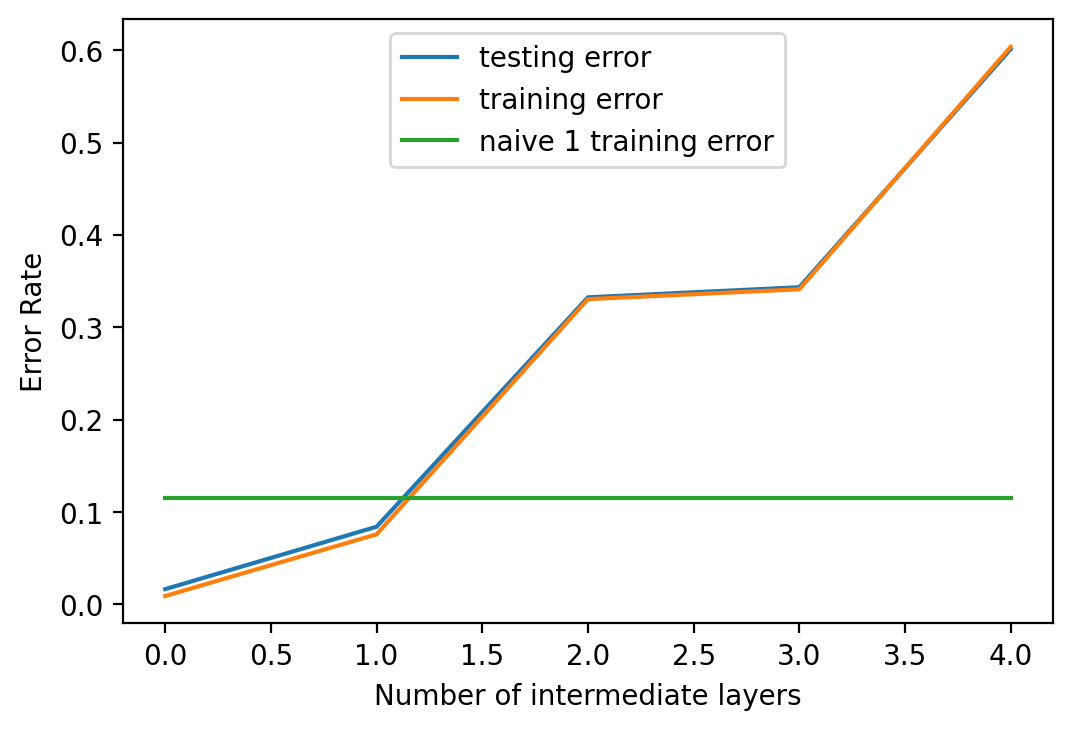

In [35]:

plt.rcParams['figure.dpi'] = 200
plt.plot(layers, test_err_data, label = 'testing error')
plt.plot(layers,train_err_data, label='training error')
#plt.plot(layers, naive0_err_data, label = 'naive 0 testing error')
plt.plot(layers,naive1_err_data, label='naive 1 training error')
plt.legend(loc="upper center")
plt.xlabel("Number of intermediate layers")
plt.ylabel("Error Rate")

plt.show()

In [1]:
train_err_data


NameError: name 'train_err_data' is not defined